# Análise Exploratória do Sucesso Cinematográfico: Desvendando Padrões em Gênero, Duração e Narrativa

Desafio Técnico - LightHouse 
Data Scientist: Carlos Renê Lima Silveira
Data: 08/09/2025

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from wordcloud import WordCloud, STOPWORDS
from adjustText import adjust_text

df = pd.read_csv('./database/dados_tratados.csv')

## 1. Sumário

Este estudo, que analisa dados sobre o que faz um filme ser bem-sucedido, mostra que ter boas críticas e ganhar muito dinheiro nas bilheteiras vem de estratégias diferentes, e não de uma única receita. A pesquisa feita em Python mostra três conclusões principais. A escolha do gênero é uma decisão importante. Gêneros específicos, como o 'Film-Noir', sempre recebem as melhores críticas, sendo uma boa maneira de ganhar reconhecimento. Por outro lado, os gêneros populares, que geram mais dinheiro, mostram um risco maior e resultados mais variados em termos de sucesso. A duração do filme mostrou uma boa relação com a qualidade que as pessoas acham que ele tem. Filmes e séries que têm mais de 150 minutos costumam receber as melhores notas. Isso mostra que o público gosta de histórias que têm tempo para criar tramas e personagens de maneira mais detalhada. No entanto, é importante encontrar um bom equilíbrio para que a história não fique lenta. A análise encontrou dois tipos de diretores que se destacam: os mestres clássicos, que são muito respeitados, mas têm um faturamento menor comparado ao que se espera hoje; e os diretores de grandes sucessos, como Christopher Nolan, que lideram franquias que fazem muito dinheiro em todo o mundo. Em resumo, o sucesso de um filme envolve várias partes diferentes. Muitas vezes, ser bem avaliado pelos críticos e ganhar dinheiro não andam juntos.

## 2. Introdução

A indústria do cinema é altamente competitiva, onde o sucesso de um filme depende de uma combinação de diversos fatores. Entender quais características tornam um filme aclamado pela crítica e pelo público é uma vantagem estratégica importante. Este estudo tem como foco realizar uma análise exploratória de dados (EDA) para descobrir padrões e relações entre as variáveis de um filme e seus indicadores de sucesso, como a avaliação do IMDB, a nota do Metacritic e a receita total de bilheteria.

Para guiar esta análise, apresentamos quatro hipóteses principais:

1.O gênero de um filme tem um impacto direto na forma como o público o recebe e no seu desempenho nas bilheterias?

2.Existe uma duração que aumenta as chances de um filme receber boas avaliações?

3.O reconhecimento de diretores, atores renomados e a opinião da crítica realmente influenciam o sucesso de uma produção?

4.As sinopses de um filme podem indicar temas narrativos que frequentemente aparecem em obras de sucesso?


## 3. Metodologia e Preparação dos Dados

Fizemos nossa análise com Python, usando ferramentas eficientes para cada parte do processo. Utilizamos o Pandas para trabalhar com os dados, o Matplotlib e o Seaborn para fazer gráficos que mostram informações, e o WordCloud para ver com que frequência as palavras aparecem nos textos. Antes de analisar, organizamos os dados passando por um cuidadoso processo de limpeza. Primeiro, ajustamos os valores que estavam faltando: usamos a mediana para preencher os dados de bilheteira (Gross) a fim de evitar que números muito altos ou muito baixos dessem uma ideia errada, e utilizamos a média para completar a pontuação da crítica (Meta_score). Depois, transformamos as colunas de texto, como Duração e Renda, em números para podermos fazer cálculos. Nós também removemos todos os filmes que estavam repetidos na lista. Uma parte importante foi organizar os gêneros: separamos os filmes que têm mais de um gênero em linhas diferentes, uma para cada categoria. Isso nos ajudou a analisar os dados de maneira muito mais precisa.

In [2]:
display(df)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Godfather,1972,A,175,Drama,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Dark Knight,2008,UA,152,Crime,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
4,The Dark Knight,2008,UA,152,Drama,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,Lifeboat,1944,Not Rated,97,Drama,7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,23457439.5
2536,Lifeboat,1944,Not Rated,97,War,7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,23457439.5
2537,The 39 Steps,1935,Not Rated,86,Crime,7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,23457439.5
2538,The 39 Steps,1935,Not Rated,86,Mystery,7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,23457439.5


## 4. Análise Exploratória e Resultados 

### 4.1 Hipótese 1: O Gênero como Fator Determinante de Audiência

Para investigar a influência do gênero, analisamos sua relação com o faturamento e as notas de avaliação do público.

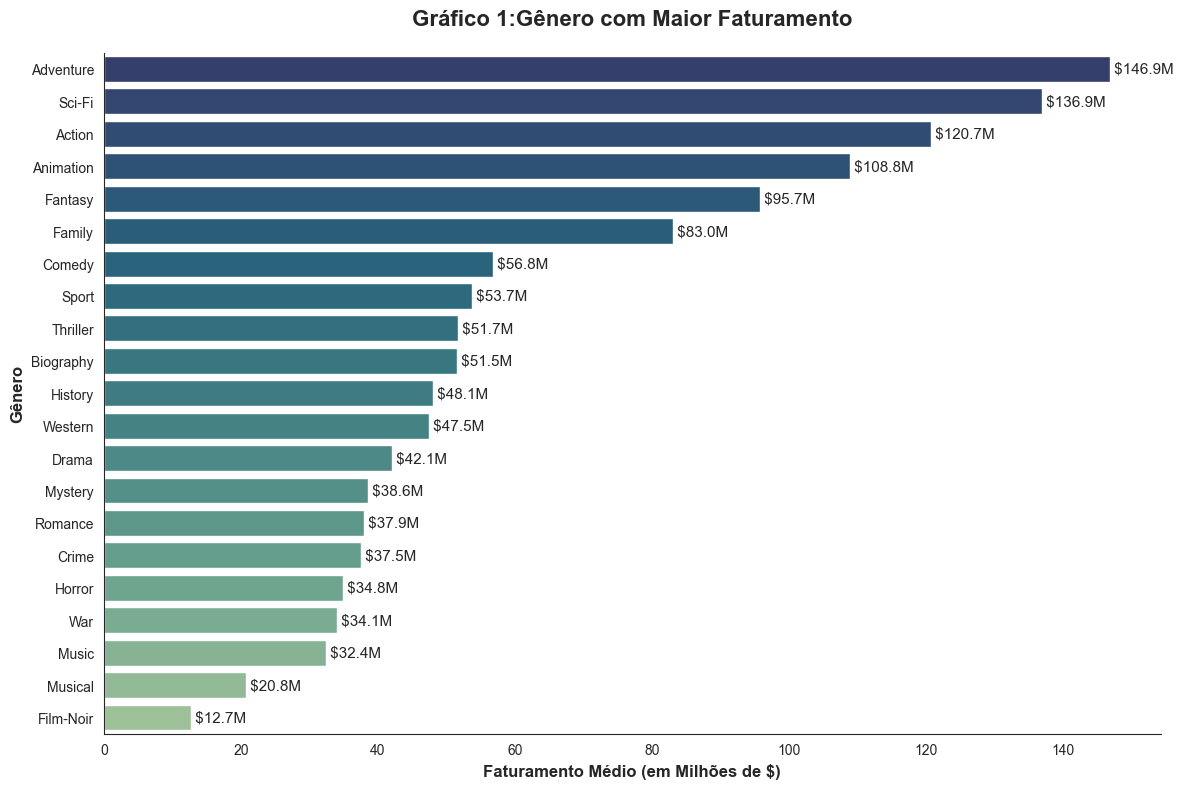

In [11]:
genero = df.copy()


faturamento_genero = (
    genero.groupby('Genre', as_index=False)['Gross']
    .mean()
    .sort_values('Gross', ascending=False)
)


faturamento_genero['faturamento_milhoes'] = faturamento_genero['Gross'] / 1e6


sns.set_style("white") 
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=faturamento_genero, x='faturamento_milhoes', y='Genre', hue= 'Genre', palette='crest_r')
sns.despine()

ax.set_xlabel('Faturamento Médio (em Milhões de $)', fontsize=12, weight='bold')
ax.set_ylabel('Gênero', fontsize=12, weight='bold')
ax.set_title('Gráfico 1:Gênero com Maior Faturamento', fontsize=16, weight='bold', pad=20)

for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    ax.text(width, y, f' ${width:,.1f}M',ha='left', va='center', fontsize=11)


plt.tight_layout()
plt.show()


Como pode ser observado no Gráfico 1, os gêneros 'Aventura', 'Ação' e 'Sci-Fi' apresentam o maior faturamento médio, indicando um forte apelo comercial.

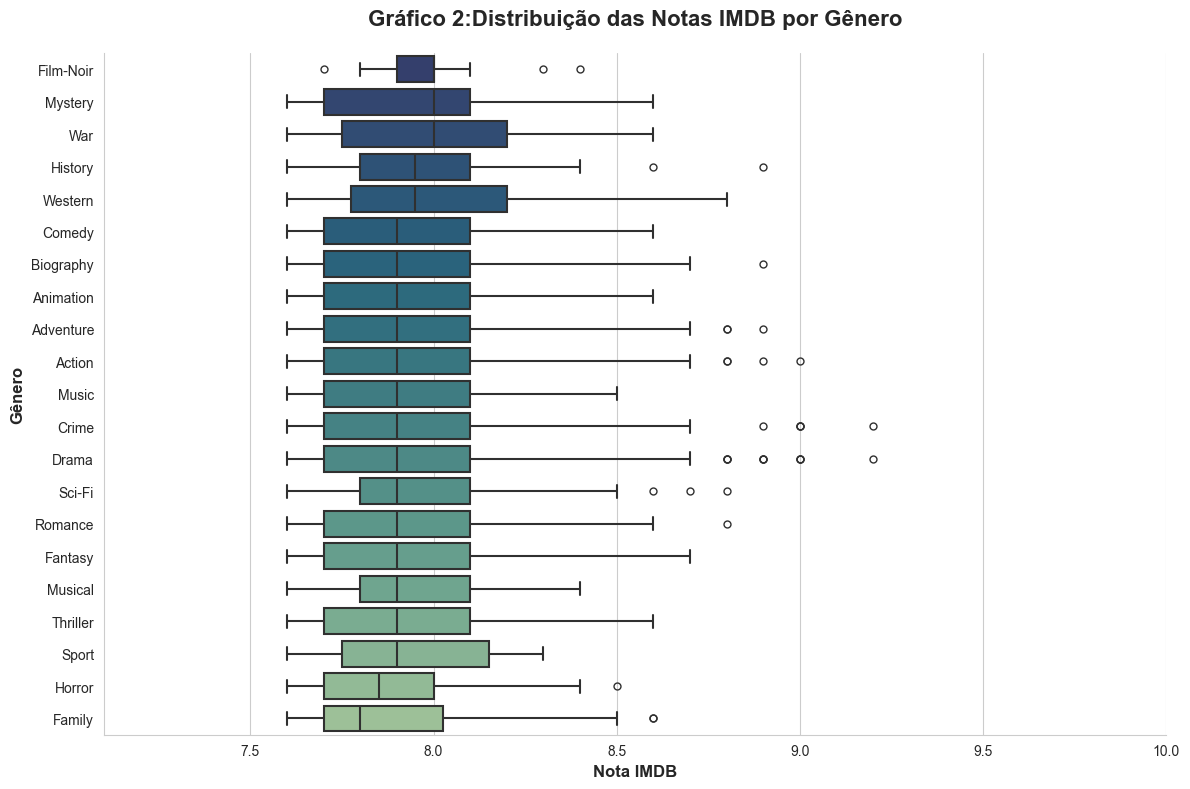

In [12]:
rating_medio_genero = (
    genero.groupby('Genre', as_index=False)['IMDB_Rating']
    .median()
    .sort_values('IMDB_Rating', ascending=False)
)
top_genres = rating_medio_genero['Genre'].tolist()

plot_data = genero[genero['Genre'].isin(top_genres)].copy()
plot_data['Genre'] = pd.Categorical(plot_data['Genre'], categories=top_genres, ordered=True)


sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=plot_data, x='IMDB_Rating', y='Genre',order=top_genres,hue='Genre',palette='crest_r', fliersize=5, linewidth=1.5)
sns.despine()

ax.set_xlabel('Nota IMDB', fontsize=12, weight='bold')
ax.set_ylabel('Gênero', fontsize=12, weight='bold')
ax.set_title('Gráfico 2:Distribuição das Notas IMDB por Gênero', fontsize=16, weight='bold', pad=20)

xmin = max(plot_data['IMDB_Rating'].min() - 0.5, 0)
ax.set_xlim(xmin, 10)

plt.tight_layout()
plt.show()


O Gráfico 2 expõe uma visão estratégica clara: sucesso de bilheteria não é sinônimo de aclamação. Gêneros de nicho, como 'Film-Noir', apresentam o menor faturamento, mas, em troca, entregam as avaliações mais altas e consistentes no IMDB.

Isso aponta para uma decisão de portfólio para qualquer estúdio: enquanto gêneros populares buscam alto faturamento com risco elevado (como indicam seus outliers), os gêneros de menor apelo comercial oferecem um caminho mais seguro para o prestígio e a qualidade. Em outras palavras, os filmes de menor bilheteria são, em média, uma aposta mais sólida em termos de avaliação crítica e do público.

### 4.2 Hipótese 2: Em Busca da Duração Ideal

A hipótese aqui é que a duração de um filme é tão importante quanto o seu gênero, podendo impactar diretamente a paciência e o engajamento do espectador.

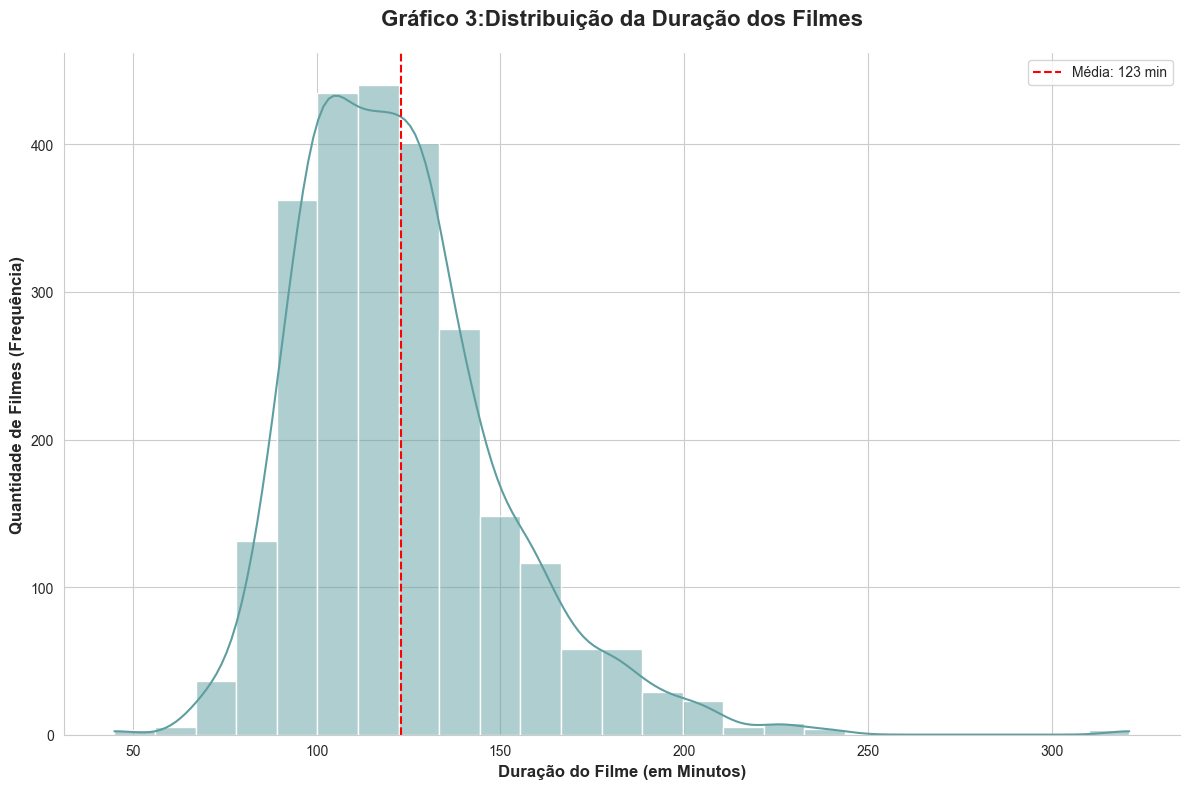

In [13]:
runtime_df = df.copy()

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=runtime_df,x='Runtime',kde=True,bins=25,color='cadetblue')

mean_runtime = runtime_df['Runtime'].mean()
ax.axvline(mean_runtime, color='red', linestyle='--', label=f'Média: {mean_runtime:.0f} min')

sns.despine()
ax.set_xlabel('Duração do Filme (em Minutos)', fontsize=12, weight='bold')
ax.set_ylabel('Quantidade de Filmes (Frequência)', fontsize=12, weight='bold')
ax.set_title('Gráfico 3:Distribuição da Duração dos Filmes', fontsize=16, weight='bold', pad=20)
ax.legend()

plt.tight_layout()
plt.show()

O Gráfico 3, um histograma da duração, mostra que a grande maioria dos filmes se concentra na faixa de 90 a 120 minutos.

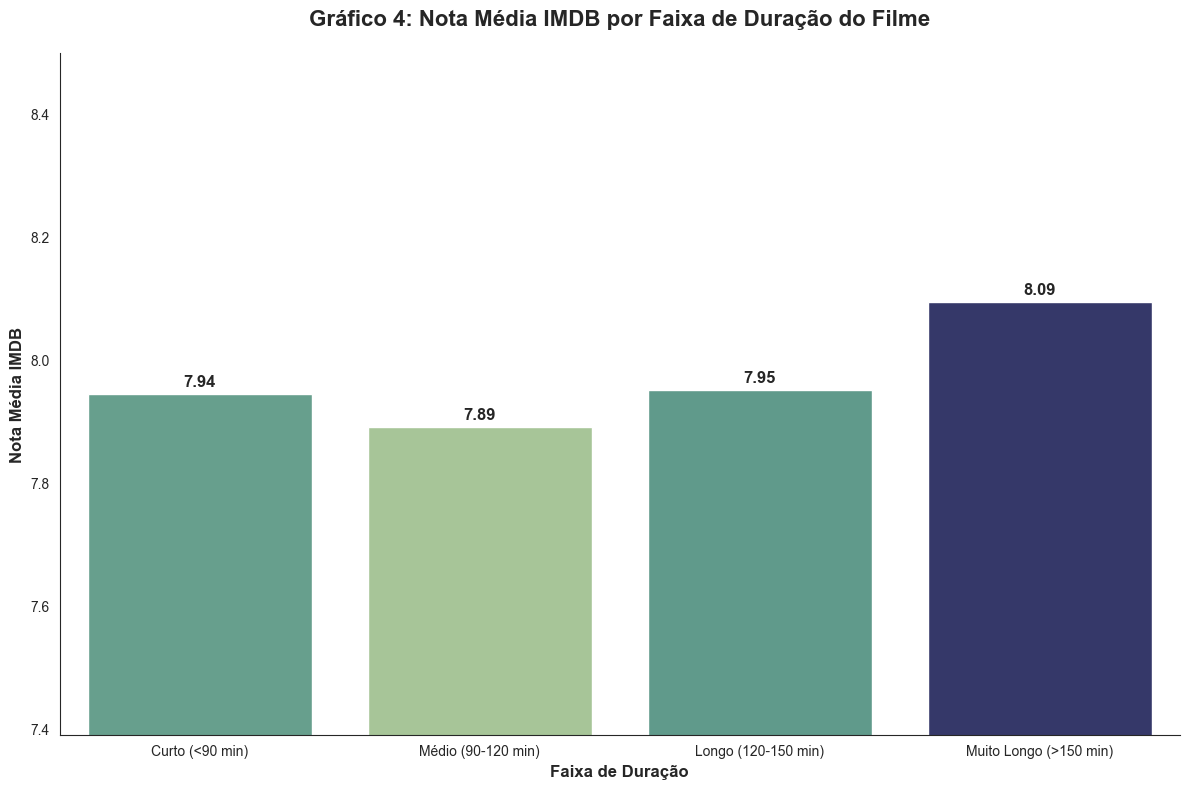

In [14]:
bins = [0, 90, 120, 150, float('inf')]
labels = ['Curto (<90 min)', 'Médio (90-120 min)', 'Longo (120-150 min)', 'Muito Longo (>150 min)']

runtime_df['Faixa_Duracao'] = pd.cut(df['Runtime'], bins=bins, labels=labels, right=False)


media_por_faixa = runtime_df.groupby('Faixa_Duracao', as_index=False, observed=False)['IMDB_Rating'].mean()


sns.set_style("white")
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=media_por_faixa, x='Faixa_Duracao', y='IMDB_Rating', hue='IMDB_Rating', palette='crest')
sns.despine()


ax.set_xlabel('Faixa de Duração', fontsize=12, weight='bold')
ax.set_ylabel('Nota Média IMDB', fontsize=12, weight='bold')
ax.set_title('Gráfico 4: Nota Média IMDB por Faixa de Duração do Filme', fontsize=16, weight='bold', pad=20)
ax.set_ylim(bottom=media_por_faixa['IMDB_Rating'].min() - 0.5) 

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=12, weight='bold')

ax.legend_.remove()
plt.tight_layout()
plt.show()

O Gráfico 4 aprofunda a análise ao correlacionar a duração dos filmes com suas respectivas notas no IMDB. Os dados revelam uma forte tendência: as avaliações mais altas (superiores a 8.0) estão predominantemente concentradas em produções com mais de 150 minutos. Em contrapartida, filmes com duração inferior a 90 minutos raramente figuram entre os mais aclamados.

Essa evidência sugere que o público tende a valorizar narrativas que dispõem de tempo suficiente para um desenvolvimento aprofundado de personagens e tramas complexas. No entanto, a duração excessiva apresenta um risco de desengajamento. Portanto, o desafio para os cineastas reside em encontrar um equilíbrio preciso, oferecendo profundidade narrativa sem sacrificar o ritmo e o interesse da audiência.

### 4.3 Hipótese 3: O Impacto Mensurável do 'Star Power' e da Crítica

Investigamos se o prestígio de diretores se convertem em sucesso tangível (financeiro e de público).

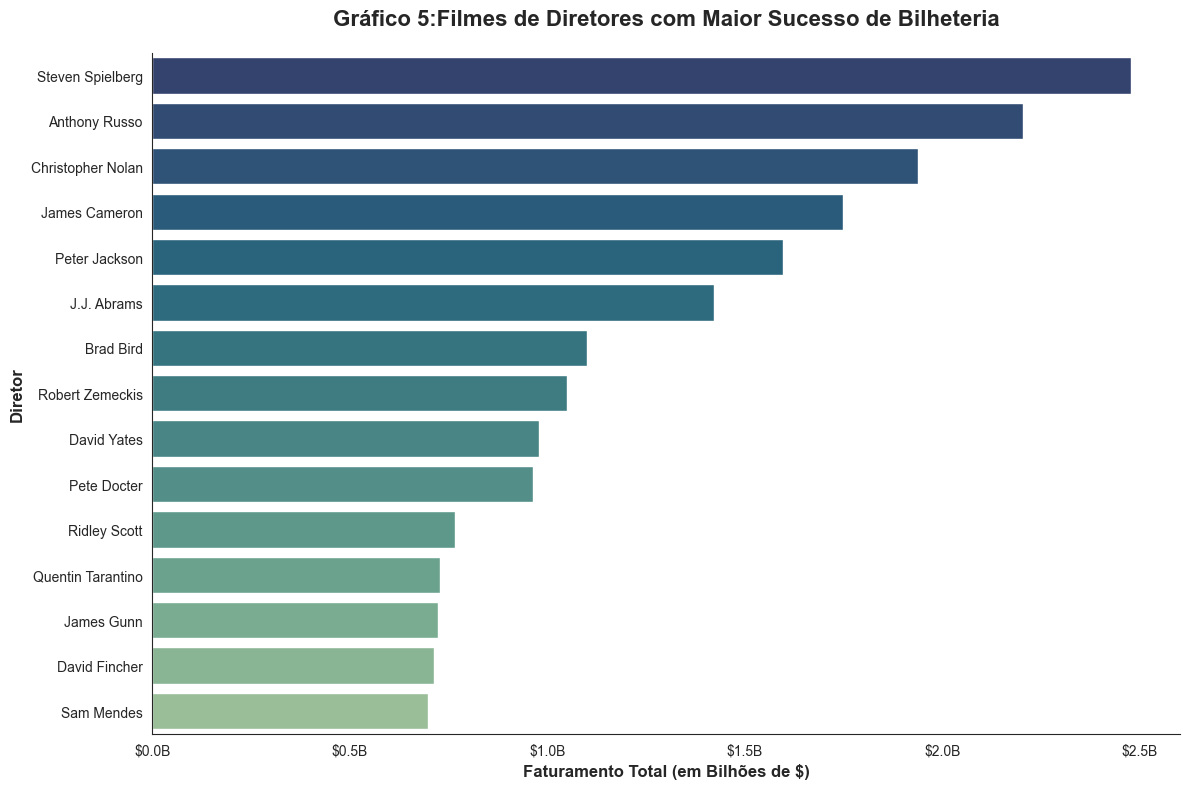

In [22]:
diretor_df = df.copy()

diretor_df.drop_duplicates(subset=['Series_Title'], inplace=True)

faturamento_total_diretor = (
    diretor_df.groupby('Director', as_index=False)['Gross']
    .sum()
    .sort_values('Gross', ascending=False)
    .head(15)
)

faturamento_total_diretor['Gross_Milhoes'] = faturamento_total_diretor['Gross'] / 1e9


sns.set_style("white")
plt.figure(figsize=(12, 8))

ax = sns.barplot(data=faturamento_total_diretor, x='Gross_Milhoes', y='Director',hue='Director' , palette='crest_r')
sns.despine()

ax.set_xlabel('Faturamento Total (em Bilhões de $)', fontsize=12, weight='bold')
ax.set_ylabel('Diretor', fontsize=12, weight='bold')
ax.set_title('Gráfico 5:Filmes de Diretores com Maior Sucesso de Bilheteria', fontsize=16, weight='bold', pad=20)


ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'${x:,.1f}B'))

plt.tight_layout()
plt.show()

Ao analisar o gráfico, percebemos que os diretores com maior faturamento no cinema alcançaram esse destaque principalmente por estarem à frente de grandes franquias de sucesso.

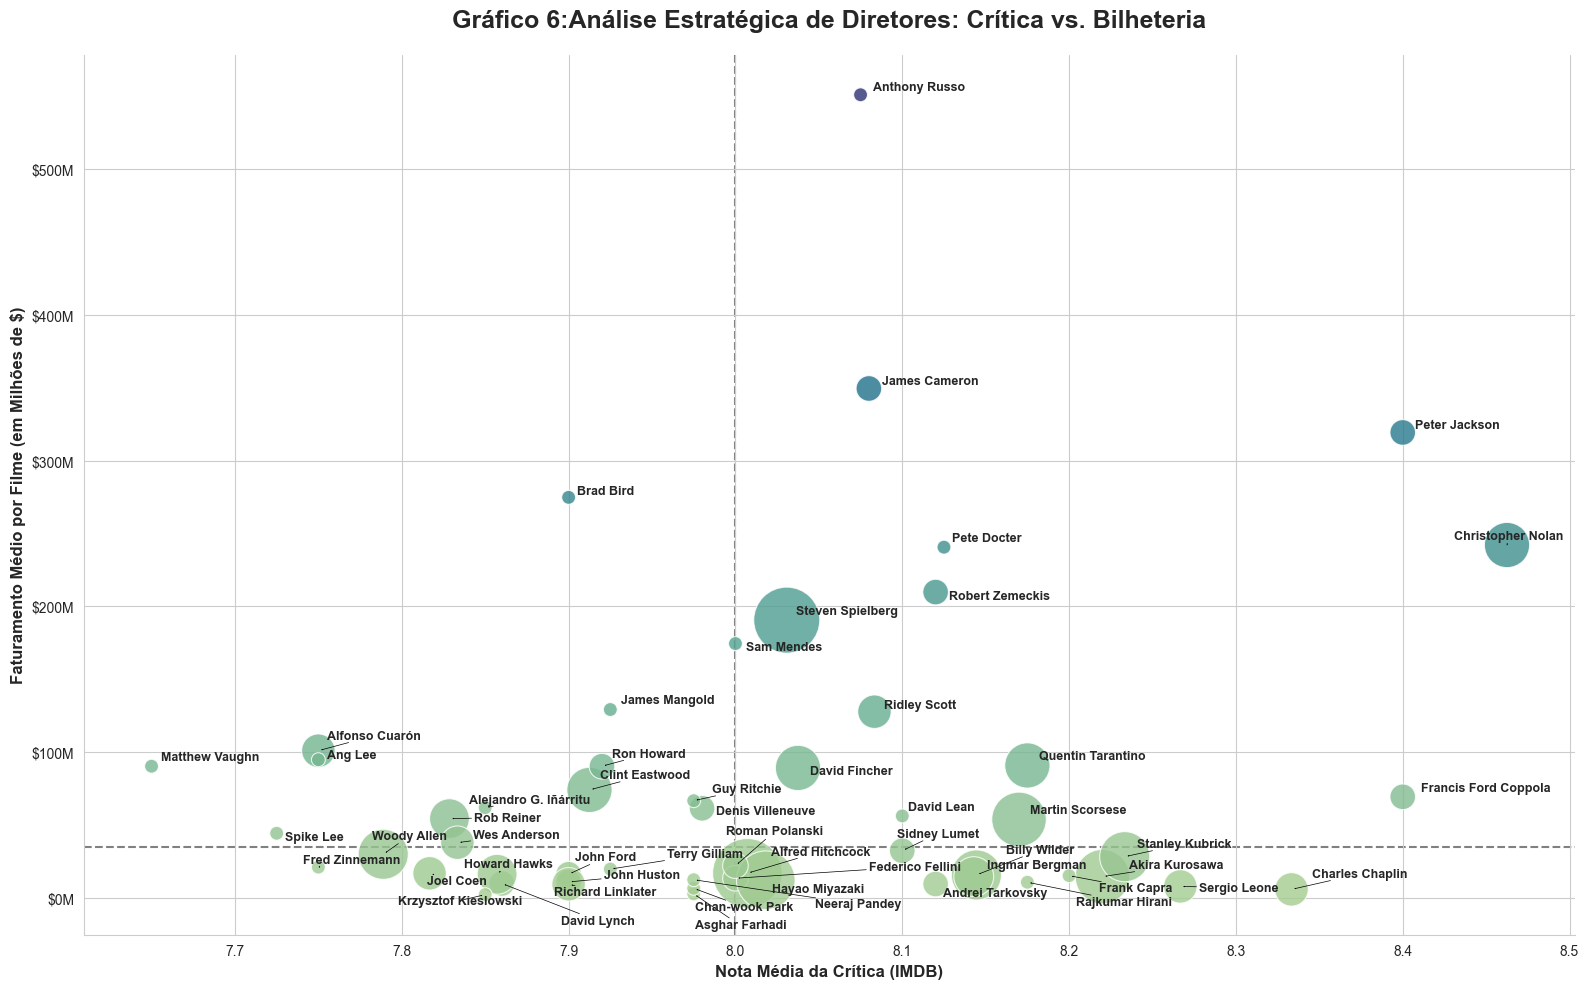

In [26]:
contagem_filmes = diretor_df['Director'].value_counts()
diretores_relevantes = contagem_filmes[contagem_filmes >= 4].index

df_diretores_filtrados = diretor_df[diretor_df['Director'].isin(diretores_relevantes)]

analise_diretores = (
    df_diretores_filtrados.groupby('Director', as_index=False)
    .agg(
        Nota_Media=('IMDB_Rating', 'mean'),
        Faturamento_Medio=('Gross', 'mean'),
        Contagem_Filmes=('Series_Title', 'count')
    )
)


analise_diretores['Faturamento_Medio_Milhoes'] = analise_diretores['Faturamento_Medio'] / 1e6


sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))

ax = sns.scatterplot(
    data=analise_diretores,
    x='Nota_Media',
    y='Faturamento_Medio_Milhoes',
    size='Contagem_Filmes',
    sizes=(100, 2500),
    palette='crest',
    hue='Faturamento_Medio_Milhoes',
    alpha=0.8,
    legend=False
)

sns.despine()

mediana_nota = analise_diretores['Nota_Media'].median()
mediana_faturamento = analise_diretores['Faturamento_Medio_Milhoes'].median()

ax.axvline(mediana_nota, color='grey', linestyle='--', lw=1.5, zorder=0)
ax.axhline(mediana_faturamento, color='grey', linestyle='--', lw=1.5, zorder=0)


texts = []
for i, row in analise_diretores.iterrows():
    texts.append(
        plt.text(
            row['Nota_Media'], 
            row['Faturamento_Medio_Milhoes'], 
            row['Director'],
            fontsize=9,
            fontweight='bold'
        )
    )


adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=0.5))


ax.set_xlabel('Nota Média da Crítica (IMDB)', fontsize=12, weight='bold')
ax.set_ylabel('Faturamento Médio por Filme (em Milhões de $)', fontsize=12, weight='bold')
ax.set_title('Gráfico 6:Análise Estratégica de Diretores: Crítica vs. Bilheteria', fontsize=18, weight='bold', pad=20)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, p: f'${y:,.0f}M'))


plt.tight_layout()
plt.show()

Ao dividirmos os diretores em quatro quadrantes de desempenho, dois perfis distintos e estratégicos emergem: o mestre da crítica e o gigante da bilheteria.

De um lado, temos os diretores clássicos. Seus filmes são sinônimos de prestígio e altas notas no IMDB, mas seu sucesso comercial, visto hoje, parece limitado, em grande parte devido ao contexto histórico de suas produções. Do outro lado, estão os arquitetos dos blockbusters modernos, como Christopher Nolan e os irmãos Russo, que provaram ter a fórmula para o sucesso comercial em escala global, liderando franquias que redefiniram o conceito de faturamento.

### 4.4 Hipótese 4: O Poder Narrativo da Sinopse (Overview)

Por fim, exploramos se os temas contidos na sinopse poderiam revelar uma "fórmula" para histórias que cativam o público.

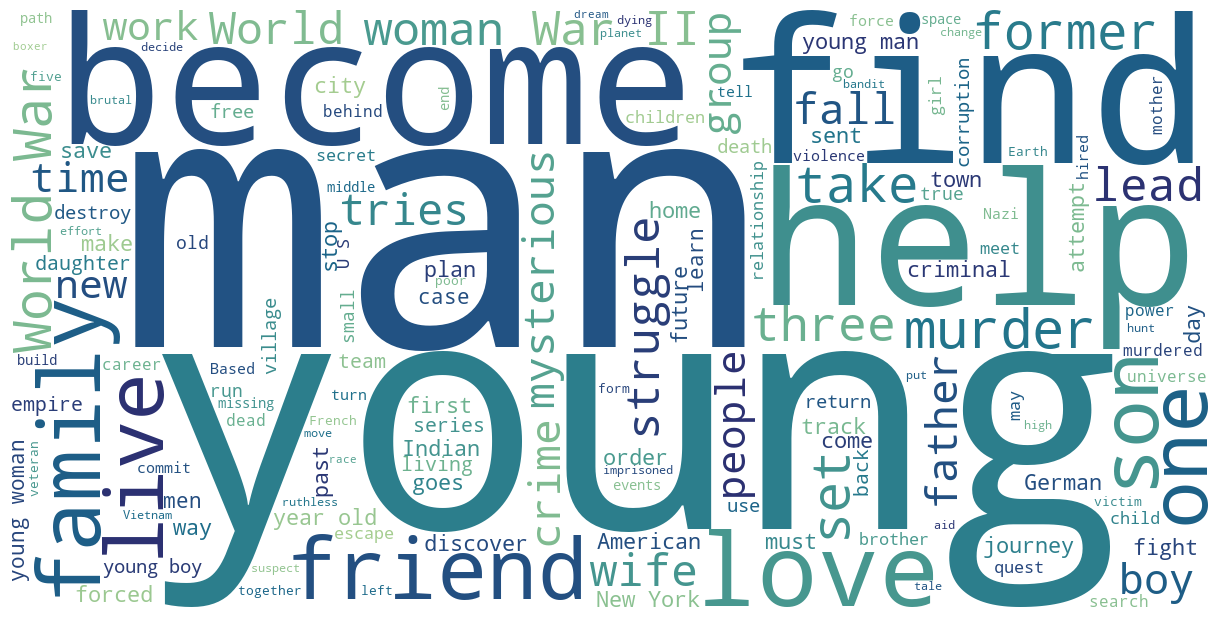

In [9]:
top_filmes = df[df['IMDB_Rating'] >= 8.0].copy()

texto_completo = top_filmes['Overview'].str.cat(sep=' ')

stopwords_en = set(STOPWORDS)
stopwords_en.update(['film', 'movie', 'story', 'character', 'life', 'two', 'will'])


wordcloud = WordCloud(
    width=1200,               
    height=600,               
    background_color='white',
    stopwords=stopwords_en,
    max_words=150,             
    colormap='crest',
    contour_width=1,
    contour_color='steelblue'
).generate(texto_completo)



plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Para explorar esta dimensão, foi gerada uma nuvem de palavras a partir das sinopses dos filmes com as maiores notas do IMDB. O resultado é revelador. Palavras como "encontrar" (find), "homem" (man), "jornada" (journey), "jovem" (young), "guerra" (war) e "família" (family) se destacam. A proeminência desses termos sugere que, independentemente do gênero, as narrativas que mais ressoam com o público e a crítica são aquelas centradas em dramas humanos universais, jornadas de transformação e conflitos existenciais.

## 5. Conclusão

A análise exploratória realizada neste estudo confirma que o sucesso cinematográfico não é um evento aleatório, mas sim o resultado de uma combinação de fatores observáveis. Concluímos que um filme com alto potencial de sucesso tende a pertencer a um gênero de grande apelo comercial como 'Ação' ou 'Aventura', possuir uma duração entre 120 e 150 minutos, ser bem avaliado pela crítica especializada e dirigido por um nome de prestígio. Além disso, a história contada provavelmente explorará temas humanos profundos e universais. Esses insights, derivados diretamente dos dados, oferecem um valioso panorama estratégico sobre a anatomia de um filme de sucesso.